In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [3]:
df = pd.read_csv("Parkinsson disease.csv")

In [4]:
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [7]:
#df["status"]

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [108]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [109]:
print(df.dtypes)

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [111]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

Visualizing dataset

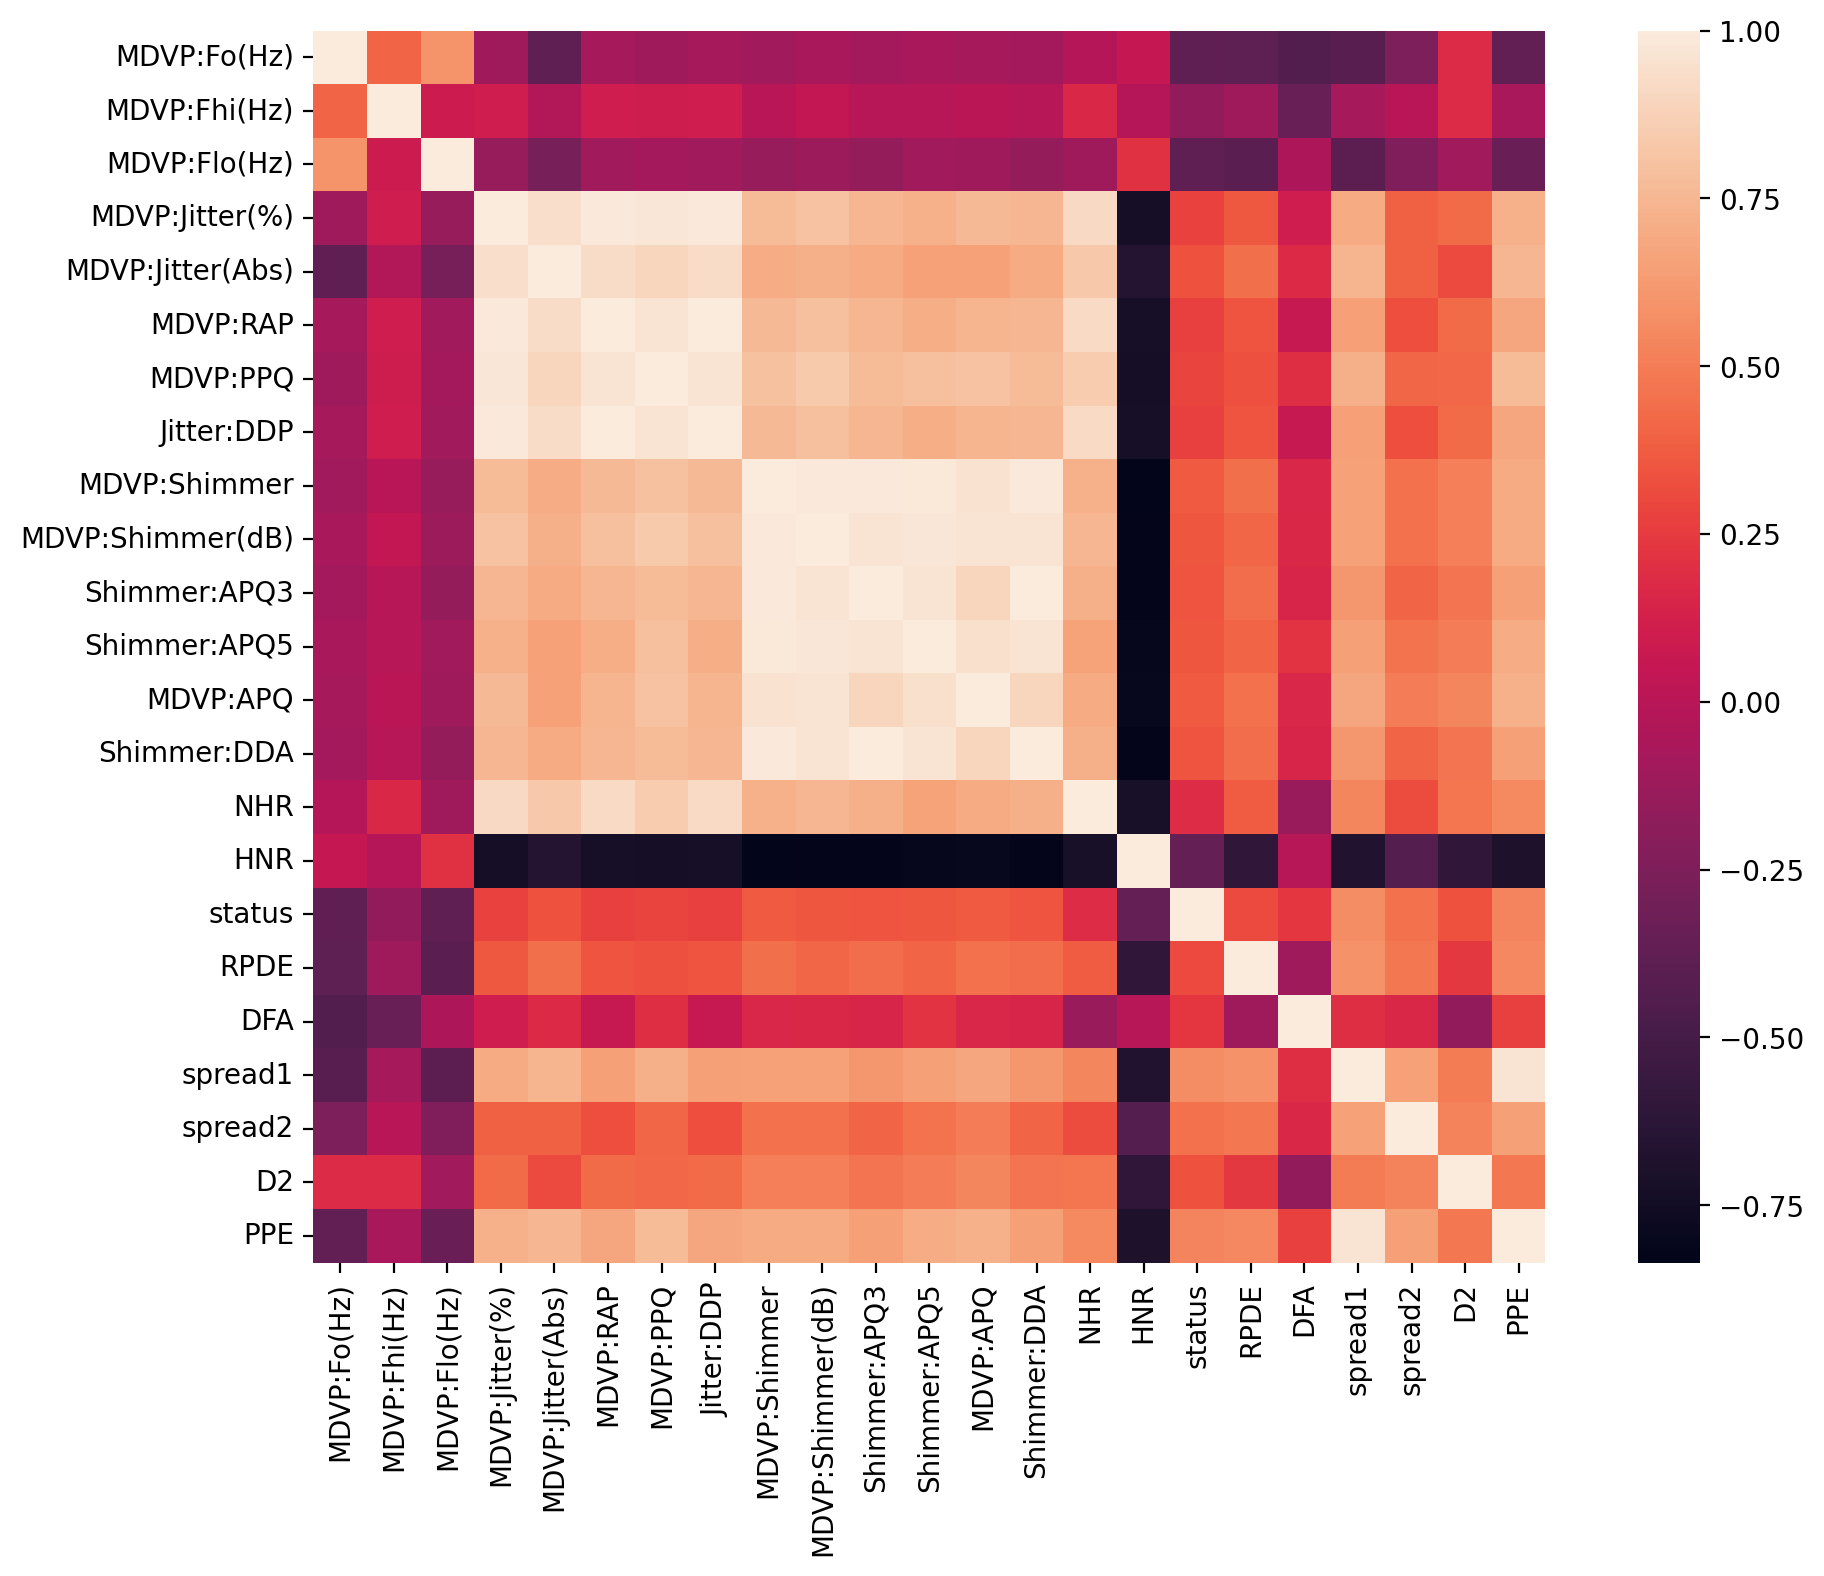

In [118]:
plt.figure(figsize = (12, 8), dpi = 200)
corr_map=df.corr()
sns.heatmap(corr_map,square=True);

In [119]:
# correlation coefficient values in each attributes.
correlation_values=df.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

Label Encoder/One Hot Encoder
Encoding the Categorical values into numerical values is not required in this dataset. Because all values we have floating type only. we have name column as a categorical values but we are not going to use that column in model prediction.

So no need to apply label encoding...

In [122]:
# split the dataset into input and output attribute.
cols=['MDVP:RAP','Jitter:DDP','DFA','NHR','MDVP:Fhi(Hz)','name','status']
X = df.drop(cols,axis=1)
y = df['status']

In [123]:
# Splitting the dataset into trianing and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

C:\Users\abarr\.conda\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\abarr\.conda\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

LogisticRegression : 0.839167 (0.072892)
knn : 0.884583 (0.048270)
SVC : 0.820000 (0.093890)
decision_tree : 0.845833 (0.066406)
Naive Bayes : 0.717917 (0.080602)


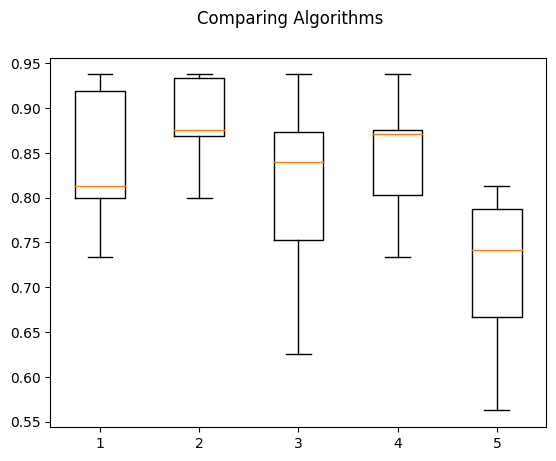

In [127]:
n_neighbors=5


# keeping all models in one list
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('knn',KNeighborsClassifier(n_neighbors=n_neighbors)))
models.append(('SVC',SVC()))
models.append(("decision_tree",DecisionTreeClassifier()))
models.append(('Naive Bayes',GaussianNB()))

# Evaluating Each model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
error='accuracy'
for name,model in models:
    fold=KFold(n_splits=10)
    result=cross_val_score(model, X_train, y_train, cv=fold, scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    

# Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
plt.boxplot(predictions)
plt.show();

C:\Users\abarr\.conda\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\abarr\.conda\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

LogisticRegression : 0.839167 (0.072892)
knn : 0.884583 (0.048270)
SVC : 0.820000 (0.093890)
decision_tree : 0.846250 (0.080654)
Naive Bayes : 0.717917 (0.080602)


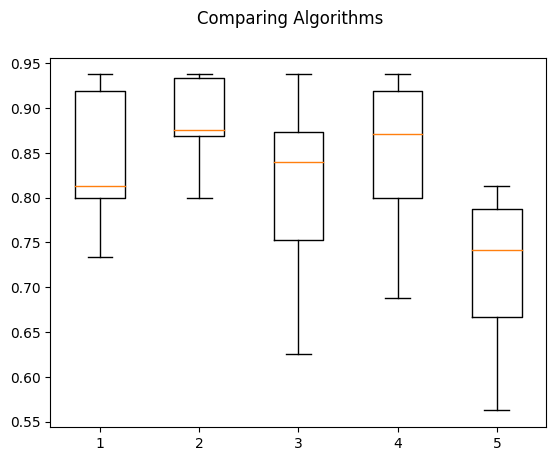

In [129]:
# Spot Checking and Comparing Algorithms With StandardScaler Scaler
from sklearn.pipeline import Pipeline
from sklearn. preprocessing import StandardScaler
pipelines=[]
pipelines.append(('scaled Logisitic Regression',Pipeline([('scaler',StandardScaler()),('LogisticRegression',LogisticRegression())])))
pipelines.append(('scaled KNN',Pipeline([('scaler',StandardScaler()),('KNN',KNeighborsClassifier(n_neighbors=n_neighbors))])))
pipelines.append(('scaled SVC',Pipeline([('scaler',StandardScaler()),('SVC',SVC())])))
pipelines.append(('scaled DecisionTree',Pipeline([('scaler',StandardScaler()),('decision',DecisionTreeClassifier())])))
pipelines.append(('scaled naive bayes',Pipeline([('scaler',StandardScaler()),('scaled Naive Bayes',GaussianNB())])))

# Evaluating Each model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
for name,model in models:
    fold=KFold(n_splits=10)
    result=cross_val_score(model, X_train, y_train, cv = fold, scoring = error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    

# Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
plt.boxplot(predictions)
plt.show()

Prediction we got without applying feature scaling

Logistic Regression Classification Algorithm : 0.859583 (0.114429)
K-Nearest Neighbors classification Algorithm : 0.834167 (0.118714)
Support Vector Machine classification Algorithm : 0.821667 (0.117951)
Decision Tree Classification Algorithm : 0.840000 (0.106771)
Naive bayes Classification Algorithm : 0.735833 (0.071715)
    
    
Prediction we got with applying feature scaling

Logistic Regression Classification Algorithm : 0.859583 (0.114429)
K-Nearest Neighbors classification Algorithm : 0.834167 (0.118714)
Support Vector Machine classification Algorithm : 0.821667 (0.117951)
Decision Tree Classification Algorithm : 0.865833 (0.076508)
Naive bayes Classification Algorithm : 0.735833 (0.071715)

Regularisation Tuning For Top 2 Classification Algorithms.
As per above accuracy we are going to pickup top 2 best performance algorithms.

Decision Tree Classification Algorithm
Logistic Regression Classification Algorithm

In [142]:
# Decision Tree Tunning Algorithms
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(X_train)
rescaledx = scaler.transform(X_train)
param_grid = dict()
model = DecisionTreeClassifier()
fold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result = grid.fit(rescaledx,y_train)

print("Best: %f  %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.840000  {} 


In [140]:
# Logistic Regression Tuning Algorithm
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(X_train)
rescaledx=scaler.transform(X_train)
c = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
param_grid = dict(C=c)
model = LogisticRegression()
fold = KFold(n_splits=10)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = error,cv = fold)
grid_result = grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.845000 using {'C': 0.2} 


scaledAB : 0.873750 (0.092460)
scaledGBC : 0.884167 (0.048940)
scaledRFC : 0.858750 (0.038615)
scaledETC : 0.916667 (0.029226)


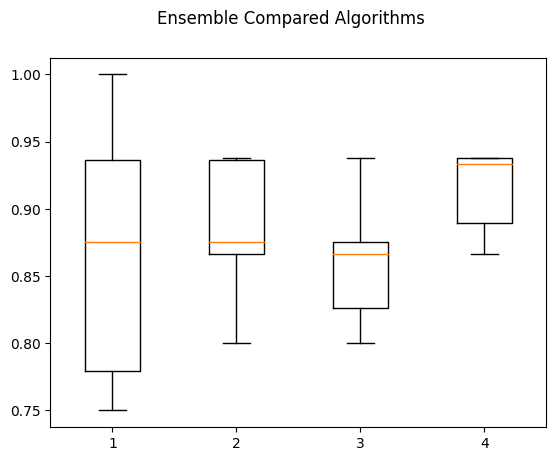

In [143]:
# Ensemble and Boosting algorithm to improve performance

#Ensemble Boosting methods
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Bagging methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
ensembles=[]
ensembles.append(('scaledAB',Pipeline([('scale',StandardScaler()),('AB',AdaBoostClassifier())])))
ensembles.append(('scaledGBC',Pipeline([('scale',StandardScaler()),('GBc',GradientBoostingClassifier())])))
ensembles.append(('scaledRFC',Pipeline([('scale',StandardScaler()),('rf',RandomForestClassifier(n_estimators=10))])))
ensembles.append(('scaledETC',Pipeline([('scale',StandardScaler()),('ETC',ExtraTreesClassifier(n_estimators=10))])))

# Evaluate each Ensemble Techinique
results=[]
names=[]
for name,model in ensembles:
    fold = KFold(n_splits=10)
    result = cross_val_score(model, X_train, y_train, cv=fold, scoring = error)
    results.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    
# Visualizing the compared Ensemble Algorithms
fig=plt.figure()
fig.suptitle('Ensemble Compared Algorithms')
plt.boxplot(results)
plt.show()

We got accuracy for ensemble algorithms likewise...

Ada Boost Classification Algorithm : 0.873750 (0.092460)
Gradient Boosting Classification Algorithm :0.884167 (0.048940)
Random Forest Classification Algorithm : 0.858750 (0.038615)
Extra Trees Classification Algoriothm :  0.916667 (0.029226)

Now we are going to tuning to top 2 ensemble algorithms.

Gradient Boosting Classification Algorithm
Extra Trees Classification Algoriothm

In [145]:
# GradientBoosting ClassifierTuning

from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(X_train)
rescaledx = scaler.transform(X_train)
n_estimators = [10,20,30,40,50,100,150,200,250,300]
learning_rate = [0.001,0.01,0.1,0.3,0.5,0.7,1.0]
param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
model = GradientBoostingClassifier()
fold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result = grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.922500 using {'learning_rate': 0.7, 'n_estimators': 200} 


In [146]:
# Extra Trees Classifier Classifier Tuning
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(X_train)
rescaledx = scaler.transform(X_train)
n_estimators = [10,20,30,40,50,100,150,200]
param_grid = dict(n_estimators=n_estimators)
model = ExtraTreesClassifier()
fold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result = grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.934583 using {'n_estimators': 150} 


In [147]:
# Finalize Model
# we finalized the Extra Trees Classification Algoriothm and evaluate the model for Detection parkinsons disease

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
scaler = StandardScaler().fit(X_train)
scaler_x = scaler.transform(X_train)
model = ExtraTreesClassifier(n_estimators=30)
model.fit(scaler_x,y_train)

#Transform the validation test set data
scaledx_test=scaler.transform(X_test)
y_pred=model.predict(scaledx_test)
y_predtrain=model.predict(scaler_x)